# 🐍 Welcome to the Navigator Playground for Python! 🚀

In this interactive guide, you're about to embark on an exciting journey to explore the world of Python programming with Navigator. Buckle up and let's dive in!

## What You'll Learn

With this guide, you will learn how to:

- 🌟 Initiate your board
- 🌡️ Read data from sensors
- ⚙️ Command thrusters, LEDs and other PWM devices

Prepare to be amazed as you bring your ideas to life through the power of Python!

## Let's Get Started

Before we launch into the coding adventures, let's set up the environment and get everything ready. Follow these steps:

1. 📦 Install Python and required packages. ( We already did it in this extension! )
2. 🚀 Connect your Navigator board. 
3. 🌐 Access the interactive JupyterLab environment OR a python instance directly. ( We are here! Let's start! )

Now we're all set to start coding and experimenting. 🎉

## Example: Reading Sensor Data

Let's dive right into an example. 

Your Navigator board comes already capable to measure a lot of cool sensors! Using Python, you can easily read data from it.

Here is our first example:

Tip: You can run using shift+enter

In [16]:
import bluerobotics_navigator as navigator

# Initialize the Navigator's sensors with factory defaults
navigator.init()

magnetometer_data = navigator.read_mag()

accelerometer_data = navigator.read_accel()

gyroscope_data = navigator.read_gyro()

print("Magnetometer Data:")
print(f"  X-axis: {magnetometer_data.x:.2f}")
print(f"  Y-axis: {magnetometer_data.y:.2f}")
print(f"  Z-axis: {magnetometer_data.z:.2f}")

print("\nAccelerometer Data:")
print(f"  X-axis: {accelerometer_data.x:.2f}")
print(f"  Y-axis: {accelerometer_data.y:.2f}")
print(f"  Z-axis: {accelerometer_data.z:.2f}")

print("\nGyroscope Data:")
print(f"  X-axis: {gyroscope_data.x:.2f}")
print(f"  Y-axis: {gyroscope_data.y:.2f}")
print(f"  Z-axis: {gyroscope_data.z:.2f}")

Magnetometer Data:
  X-axis: 4.05
  Y-axis: 2.40
  Z-axis: 30.30

Accelerometer Data:
  X-axis: 0.08
  Y-axis: -0.38
  Z-axis: 9.79

Gyroscope Data:
  X-axis: -0.00
  Y-axis: -0.02
  Z-axis: 0.00


## Example: Plotting Sensor Data

Now let's dive deeper, and plot this data. 

Please, run the next script!

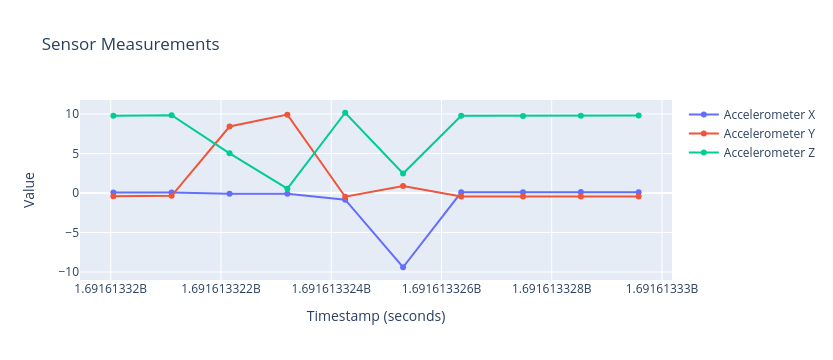

In [17]:
import bluerobotics_navigator as navigator
import plotly.graph_objs as go
from IPython.display import clear_output
import time

# Initialize the Navigator with factory defaults
navigator.init()

# Initialize lists to store data for plotting
max_data_points = 10
timestamps = []
accelerometer_x = []
accelerometer_y = []
accelerometer_z = []

# Set the interval for updating the plot (in seconds)
update_interval = 1

try:
    while True:
        # Read data from the accelerometer sensor
        accelerometer_data = navigator.read_accel()

        # Append data to the lists
        timestamps.append(time.time())
        accelerometer_x.append(accelerometer_data.x)
        accelerometer_y.append(accelerometer_data.y)
        accelerometer_z.append(accelerometer_data.z)

        # Trim data to retain only the last max_data_points
        if len(timestamps) > max_data_points:
            timestamps.pop(0)
            accelerometer_x.pop(0)
            accelerometer_y.pop(0)
            accelerometer_z.pop(0)

        # Create Plotly figure
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=timestamps, y=accelerometer_x, mode='lines+markers', name='Accelerometer X'))
        fig.add_trace(go.Scatter(x=timestamps, y=accelerometer_y, mode='lines+markers', name='Accelerometer Y'))
        fig.add_trace(go.Scatter(x=timestamps, y=accelerometer_z, mode='lines+markers', name='Accelerometer Z'))

        # Update layout
        fig.update_layout(
            title='Sensor Measurements',
            xaxis_title='Timestamp (seconds)',
            yaxis_title='Value'
        )

        # Clear previous output and display current plot
        clear_output(wait=True)
        fig.show()

        # Wait for the specified interval before updating the plot
        time.sleep(update_interval)

except KeyboardInterrupt:
    pass


## Example: Control PWM output

Now let's learn how to control PWM output. 

Please, take care when you define which PWM channel you will use and what it controls!

In [2]:
import time
import bluerobotics_navigator as navigator
from bluerobotics_navigator import PwmChannel

# Initialize the navigator
navigator.init()
navigator.set_pwm_freq_hz(1000)
navigator.set_pwm_enable(True)

# Define variables
initial_value = 0.5
upper_value = 0.7
middle_value = 0.3
final_value = 0.5
increment = 0.025
wait_time = 1  # seconds
channel = # PwmChannel.Ch16 #uncomment this line to run script on Ch16

# Start with an initial value
navigator.set_pwm_channel_duty_cycle(channel, initial_value)
print(f"Initial value set: {initial_value}")

# Increase from initial_value to upper_value
current_value = initial_value
while current_value < upper_value:
    time.sleep(wait_time)
    current_value = round(current_value + increment, 3)
    if current_value > upper_value:
        current_value = upper_value
    navigator.set_pwm_channel_duty_cycle(channel, current_value)
    print(f"Increasing: {current_value}")
    
print("Reached upper limit")

# Decrease from upper_value to middle_value
while current_value > middle_value:
    time.sleep(wait_time)
    current_value = round(current_value - increment, 3)
    if current_value < middle_value:
        current_value = middle_value
    navigator.set_pwm_channel_duty_cycle(channel, current_value)
    print(f"Decreasing: {current_value}")

print("Reached middle value")

# Increase again from middle_value to final_value
while current_value < final_value:
    time.sleep(wait_time)
    current_value = round(current_value + increment, 3)
    if current_value > final_value:
        current_value = final_value
    navigator.set_pwm_channel_duty_cycle(channel, current_value)
    print(f"Increasing: {current_value}")

print("Reached final value")

# Stop at final_value
navigator.set_pwm_channel_duty_cycle(channel, final_value)
print(f"Final value set: {final_value}")

Initial value set: 0.5
Increasing: 0.525
Increasing: 0.55
Increasing: 0.575
Increasing: 0.6
Increasing: 0.625
Increasing: 0.65
Increasing: 0.675
Increasing: 0.7
Reached upper limit
Decreasing: 0.675
Decreasing: 0.65
Decreasing: 0.625
Decreasing: 0.6
Decreasing: 0.575
Decreasing: 0.55
Decreasing: 0.525
Decreasing: 0.5
Decreasing: 0.475
Decreasing: 0.45
Decreasing: 0.425
Decreasing: 0.4
Decreasing: 0.375
Decreasing: 0.35
Decreasing: 0.325
Decreasing: 0.3
Reached middle value
Increasing: 0.325
Increasing: 0.35
Increasing: 0.375
Increasing: 0.4
Increasing: 0.425
Increasing: 0.45
Increasing: 0.475
Increasing: 0.5
Reached final value
Final value set: 0.5
